# Loading dataframe

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("women.csv")

In [5]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [7]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [8]:
df.loc[df["Rating"] > 3]["Clothing ID"]

0         767
1        1080
3        1049
4         847
6         858
         ... 
23477    1094
23479    1005
23480     862
23481    1104
23485    1104
Name: Clothing ID, Length: 18208, dtype: int64

In [10]:
from textblob import TextBlob

In [ ]:
reviews = df[["Clothing ID", "Review Text"]].values.tolist()
reviews

In [36]:
type(reviews)

list

In [42]:
for review in reviews[10:30]:
    review_text = review[1]
    if isinstance(review_text, str):
        blob = TextBlob(review_text)
        positive_reviews = blob.sentiment.polarity
    if positive_reviews > 0:
        print(review)

[1095, 'This dress is perfection! so pretty and flattering.']
[1095, 'More and more i find myself reliant on the reviews written by savvy shoppers before me and for the most past, they are right on in their estimation of the product. in the case of this dress-if it had not been for the reveiws-i doubt i would have even tried this. the dress is beautifully made, lined and reminiscent of the old retailer quality. it is lined in the solid periwinkle-colored fabric that matches the outer fabric print. tts and very form-fitting. falls just above the knee and does not rid']
[767, 'Bought the black xs to go under the larkspur midi dress because they didn\'t bother lining the skirt portion (grrrrrrrrrrr).\r\nmy stats are 34a-28/29-36 and the xs fit very smoothly around the chest and was flowy around my lower half, so i would say it\'s running big.\r\nthe straps are very pretty and it could easily be nightwear too.\r\ni\'m 5\'6" and it came to just below my knees.']
[1065, "I took these out of 

In [64]:
department = df[df["Recommended IND"] == 1]
department_filter = department.drop_duplicates(subset="Department Name", keep="first")
department_filter

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
18,18,1120,32,Super cute and cozy,"A flattering, super cozy coat. will work well...",5,1,0,General,Jackets,Outerwear
187,187,596,41,Modern comfort,This easel caftan is simply amazing! the silho...,5,1,2,General,Trend,Trend
9444,9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN


<Axes: xlabel='Department Name', ylabel='Positive Feedback Count'>

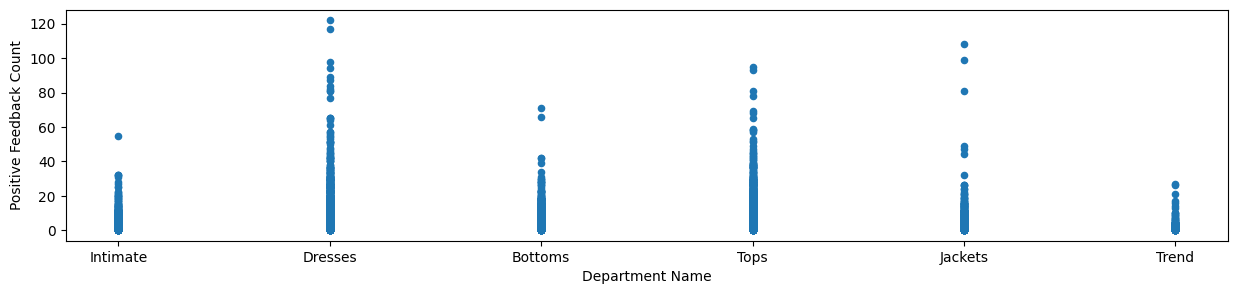

In [72]:
df_cleaned = df.dropna(subset=["Department Name", "Positive Feedback Count"])
df_cleaned.plot(x="Department Name", y="Positive Feedback Count", figsize=(15,3), kind="scatter") 